# plotting loss

In [3]:
import os
losses_path = 'losses'
print('Losses path: {}'.format(losses_path))
print('Loss files available: {}'.format('\n'.join(os.listdir(losses_path))))

loss_path = 'gaussian_true_normalized_exp_norelu.1204.txt'
with open(os.path.join(losses_path, loss_path)) as f:
  raw_data = f.readlines()

Losses path: losses
Loss files available: gaussian_true_normalized_exp_norelu.1204.txt


In [4]:
data = []

for line in raw_data:
    if 'PSNR' in line:
        iteration = line.split("/")[0]
        loss = line.split("loss = ")[1].split(",")[0]
        psnr = line.split("PSNR = ")[1].split(" ")[0]
        data.append([int(iteration), float(loss), float(psnr)])

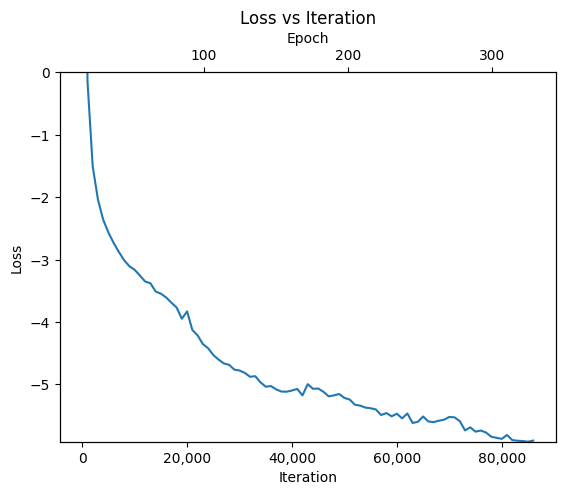

In [10]:
# plot iteration vs loss of the data
from matplotlib import pyplot as plt
import numpy as np

num_training_imgs = 8000
iterations2epoch = num_training_imgs / 32  # 4 is the batch size

plt.plot([row[0] for row in data], [row[1] for row in data])
# label axes
plt.xlabel("Iteration")
plt.ylabel("Loss")
# set y axes as logarithmic
# plt.yscale("log")
# set title
plt.title("Loss vs Iteration")
# put commas in the x axis
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)
# set another x axis
ax2 = plt.twiny()
# set the x axis to be the first one divided by 8000 but with the same ticks
ax2.set_xticks(
    [
        row[0] / iterations2epoch
        for row in data
        if row[0] % iterations2epoch == 0 and (row[0] // iterations2epoch) % 50 == 0
    ]
)
ax2.set_xlim(0, (data[-1][0] / iterations2epoch))
ax2.set_ylim(np.min([row[1] for row in data]),0)
# set the x axis label
ax2.set_xlabel("Epoch")
plt.show()

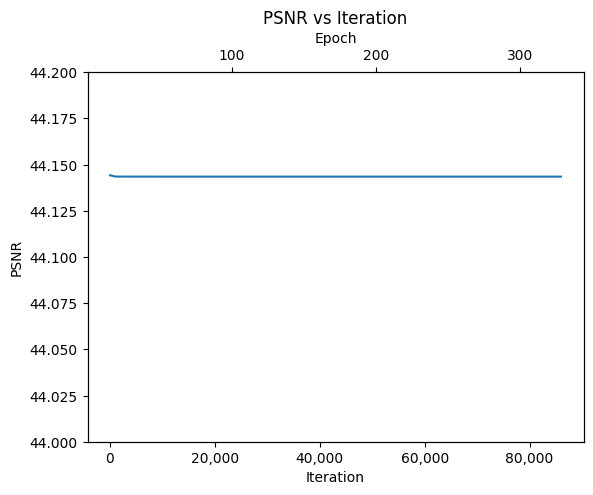

In [14]:
# plot iteration vs psnr of the data
from matplotlib import pyplot as plt

plt.plot([row[0] for row in data], [row[2] for row in data])
# label axes
plt.xlabel("Iteration")
plt.ylabel("PSNR")
# set title
plt.title("PSNR vs Iteration")
# put commas in the x axis
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)
# set another x axis
ax2 = plt.twiny()
# set the x axis to be the first one divided by 8000 but with the same ticks
ax2.set_xticks(
    [
        row[0] / iterations2epoch
        for row in data
        if row[0] % iterations2epoch == 0 and (row[0] // iterations2epoch) % 50 == 0
    ]
)
ax2.set_xlim(0, (data[-1][0] / iterations2epoch))
ax2.set_ylim(44, 44.2)
# set the x axis label
ax2.set_xlabel("Epoch")
# put a red vertical line at 10th epoch
# put a blue vertical line at iteration 110000
plt.show()

# Random test shit


In [36]:
import numpy as np

data = np.zeros((512, 512, 1))
np.squeeze(data).shape

(512, 512)

In [37]:
np.stack(
    (np.squeeze(data), np.squeeze(data), np.squeeze(data), np.squeeze(data)), axis=-1
).shape

(512, 512, 4)